<h1><font color = Cyan >Bike sharing Assignment:</font></h1>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona or Covid-19 pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- Which variables are significant in predicting the demand for shared bikes.
- How well variables describe the bike demands

GOALS: 
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### <a id="32"> Step 1: Analysing the Data </a>

In [111]:
#import the warnings:-
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
#import the useful libraries:-
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting the options to display max rows and max columns:-
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

In [3]:
bk = pd.read_csv("day.csv")

In [4]:
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [5]:
bk.shape

(730, 16)

In [6]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [7]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Droping the instant column as it is just having index number of the dataset:-
bk.drop(['instant'],axis=1,inplace=True)

In [9]:
#We already have weekday month columns so we can drop the dteday column:
bk.drop(['dteday'],axis=1,inplace=True)

In [10]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


### <a id="32"> Step 2: Visualising and Understanding the Data (EDA) </a>

**`Function to check the nulls:`**

In [11]:
# Creating a function to find the total null count and null percentage:-
def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [12]:
find_NaN(bk)

,Cnt_of_Nulls,Null_Percentage
season,0,0.0000
yr,0,0.0000
mnth,0,0.0000
holiday,0,0.0000
weekday,0,0.0000
workingday,0,0.0000
weathersit,0,0.0000
temp,0,0.0000
atemp,0,0.0000
hum,0,0.0000


**`(1) Visualising Numeric Variables:`**

In [13]:
#Lets define function Univariate:-
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

In [ ]:
# * Analysis on Column: cnt

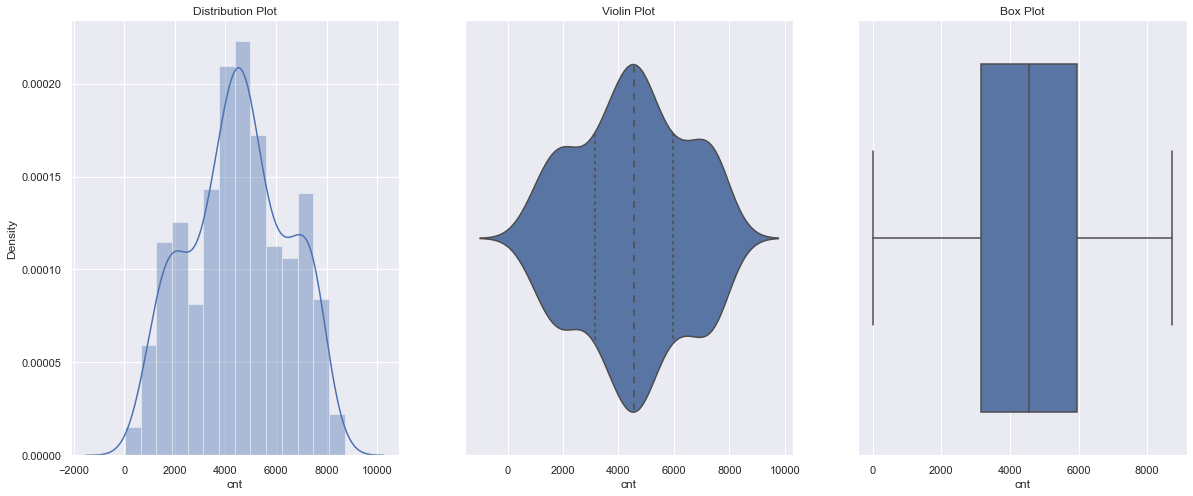

In [14]:
#Lets carry out Univariate analysis on cnt
univariate(df=bk,col='cnt')

#### Inference - Data is normally distributed bet ween 0 to 10000, mean is 4500

In [15]:
# The target variable(cnt) is the sum of the both registered and casual columns, 
# So these columns are not usefull to predict target variable we can drop these columns
# Also to avoid multicollinearity we delete the columns 'casual' and 'registered':
bk.drop(['casual','registered'],axis=1,inplace=True)

#### * Analysis on Column: windspeed

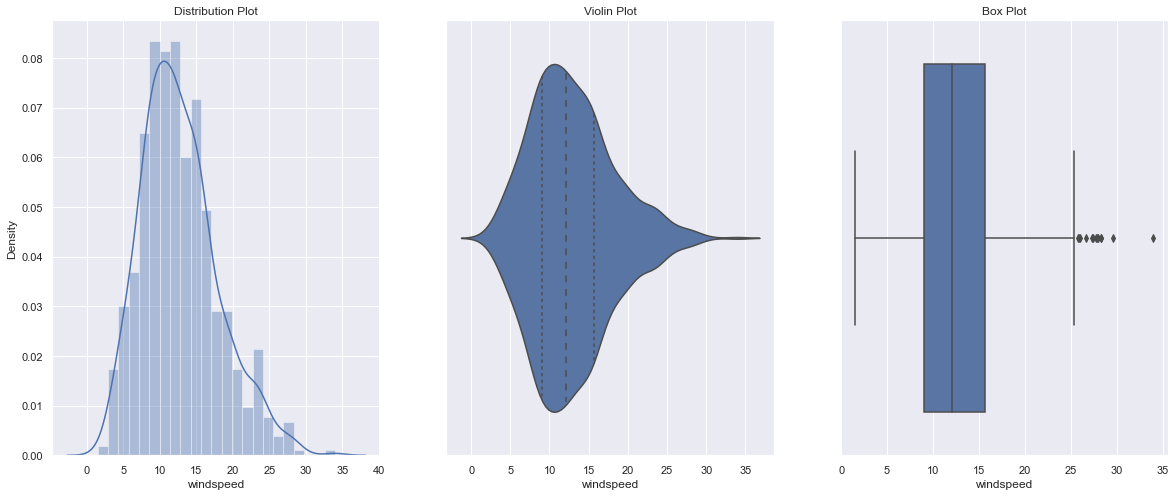

In [16]:
#Lets carry out Univariate analysis on windspeed
univariate(df=bk,col='windspeed')

#### Inference - windspeed column is normally distributed between 1 to 30 with mean of 12

#### * Analysis on Column: hum

In [17]:
bk.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,985


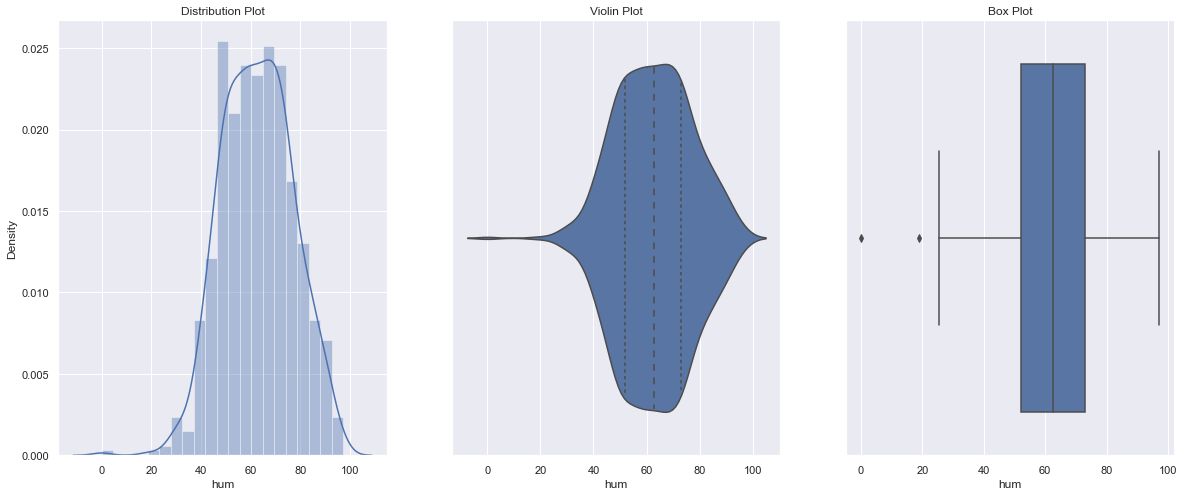

In [18]:
#Lets carry out Univariate analysis on hum
univariate(df=bk,col='hum')

##### Inference - humudity column data is right skewed normal distribution with mean of 62

#### * Analysis on Column: atemp & temp

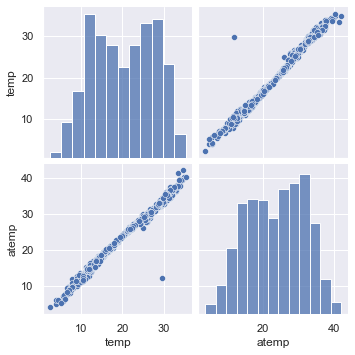

In [19]:
sns.pairplot(bk[['temp','atemp']])
plt.show()

#### Inference - Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable.

In [20]:
#Droping the atemp variable:
bk.drop(['atemp'],axis=1,inplace=True)

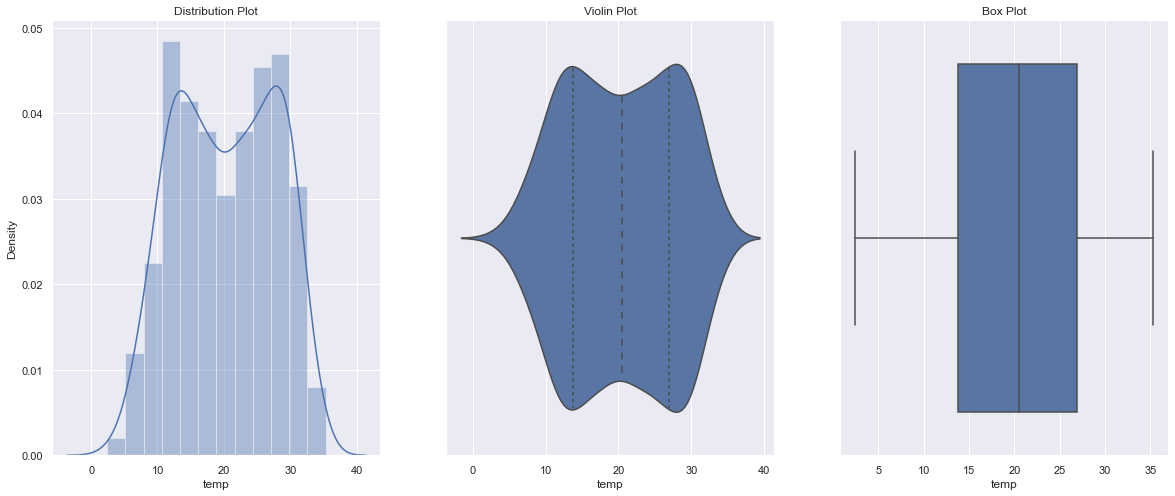

In [21]:
#Lets carry out Univariate analysis on temp
univariate(df=bk,col='temp')

#### Inference - temp column data is right skewed normal distribution with mean of 20

### Correlation Matrix and Heat Map:

In [22]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,80.5833,10.7499,985
1,1,0,1,0,0,0,2,14.9026,69.6087,16.6521,801
2,1,0,1,0,1,1,1,8.0509,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,8.2000,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,9.3052,43.6957,12.5223,1600


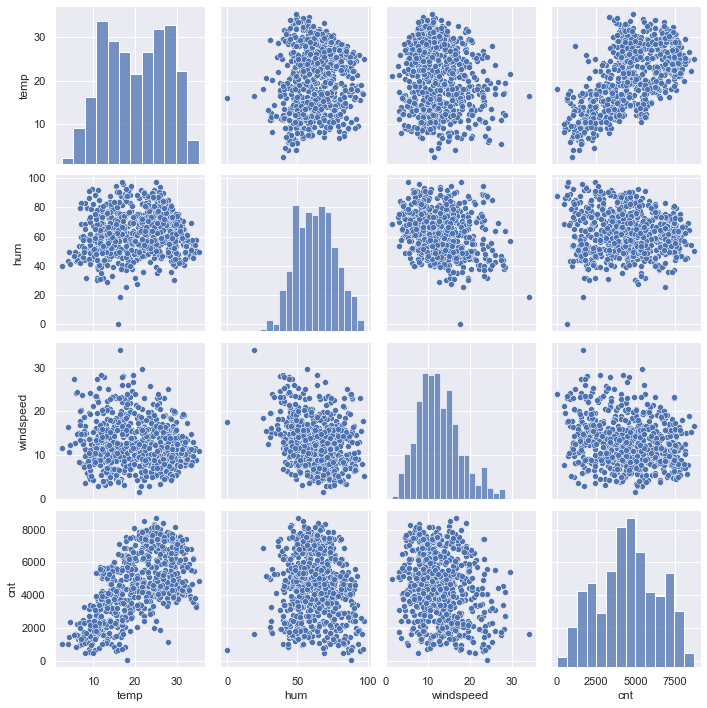

In [23]:
sns.pairplot(bk[['temp','hum','windspeed','cnt']])
plt.show()

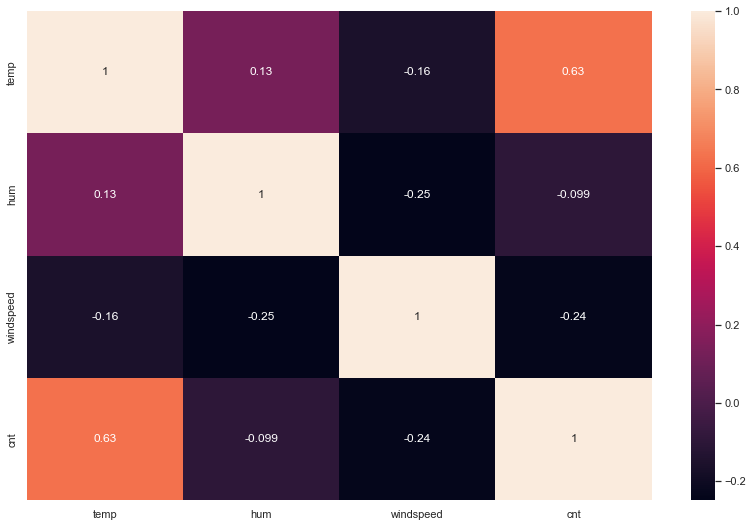

In [24]:
corr_df= bk[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

### Question -  Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
<h3><font color = green > Answer -  By looking at the pair plot temp variable has the highest (0.63) correlation with target variable 'cnt'.  </font></h3>

**`(2) Visualising Categorical  Variables:`**

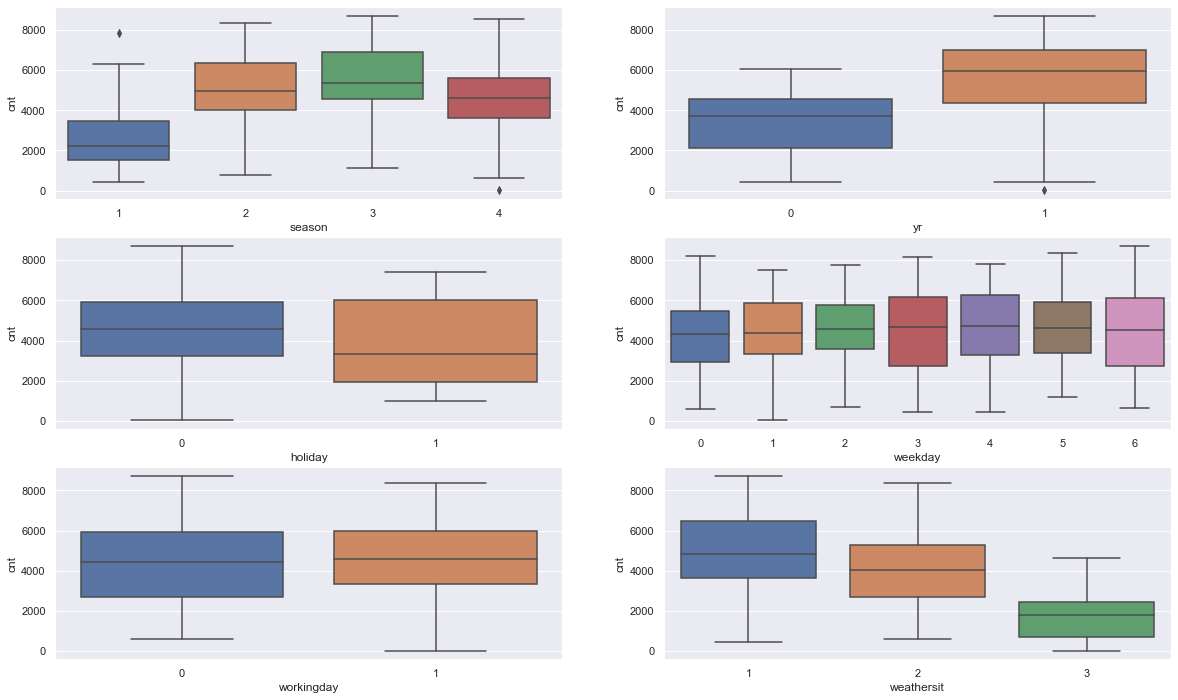

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bk)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bk)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bk)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bk)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bk)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bk)
plt.show()

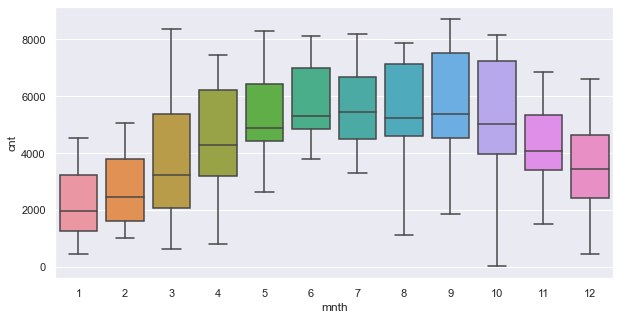

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bk)
plt.show()

### Question -  From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
<h3><font color = green >Answer - Observations from above boxplots for categorical variables: 
    <li> The year box plots indicates that more bikes are rent during 2019.</li>
    <li> The season box plots indicates that more bikes are rent during fall season.</li>
    <li> The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.</li>
    <li> The month box plots indicates that more bikes are rent during september month. </li>
    <li> The weekday box plots indicates that more bikes are rent during saturday. </li>
    <li> The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.</li>
    </font></h3>

In [27]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,80.5833,10.7499,985
1,1,0,1,0,0,0,2,14.9026,69.6087,16.6521,801
2,1,0,1,0,1,1,1,8.0509,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,8.2000,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,9.3052,43.6957,12.5223,1600


In [28]:
bk.shape

(730, 11)

### <a id="32"> Step 3: Data Preparation:</a>

In [29]:
bk.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [30]:
def ass_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
bk['season'] = bk['season'].apply(ass_season)

In [31]:
bk.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [32]:
bk.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [33]:
def ass_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

bk['mnth']=bk[['mnth']].apply(ass_month)

In [34]:
bk.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [35]:
bk.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.1108,80.5833,10.7499,985
1,spring,0,Jan,0,0,0,2,14.9026,69.6087,16.6521,801


In [36]:
def ass_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

bk['yr'] = bk['yr'].apply(ass_year)

In [37]:
bk.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [38]:
def ass_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bk['weekday']=bk[['weekday']].apply(ass_weekday)

In [39]:
bk.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [40]:
def ass_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

bk['weathersit']= bk[['weathersit']].apply(ass_weather)

In [41]:
bk.weathersit.value_counts()

Clear          463
Mist_Cloudy    246
Light_Snow      21
Name: weathersit, dtype: int64

In [42]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,spring,2018,Jan,0,Mon,1,Clear,8.0509,43.7273,16.6367,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.2000,59.0435,10.7398,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.3052,43.6957,12.5223,1600


## Creating Dummy Variables: 

* We can create dummy variables on categorical variables season,yr, mnth, weekday, and weathersit.

In [43]:
bk=pd.get_dummies(data=bk, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [44]:
bk.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,14.1108,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,14.9026,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,8.0509,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.2000,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.3052,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
bk.shape

(730, 29)

### <a id="32"> Step 4: Splitting the Data into Training and Testing Sets:</a>

<h4><font color = green >  Split the dataset to train and test data : </font></h4>

In [46]:
np.random.seed(0)
bk_train, bk_test = train_test_split(bk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
#checking shape of train and test dataframe
print("Train dataframe : ",bk_train.shape)
print("Test dataframe : ",bk_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


<h4><font color = green > Re-scale the numerical features using Standard Scaler </font></h4>

#### If we observe windspeed, hum, temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.

In [48]:
scaler = StandardScaler()

In [49]:
#We can apply scaller to all columns except dummy variables
scale_columns=['cnt','temp','hum','windspeed']
bk_train[scale_columns] = scaler.fit_transform(bk_train[scale_columns])

In [50]:
bk_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,0,1,-0.1213,-0.5147,-0.1178,1.5627,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
576,0,1,1.2317,0.5164,-0.3306,1.3996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
426,0,0,-0.4205,-0.0699,-0.3857,-0.2156,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
728,0,0,-1.2949,-1.0450,2.0181,-1.3795,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
482,0,0,-0.6276,-1.0008,-0.7799,-0.1366,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [51]:
bk_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.0255,0.6765,-0.0000,-0.0000,-0.0000,-0.0000,0.2431,0.2451,0.2490,0.0961,0.0843,0.0667,0.0882,0.0765,0.0745,0.0980,0.0843,0.0863,0.0863,0.0804,0.5078,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588,0.0294,0.3431
std,0.1578,0.4683,1.0010,1.0010,1.0010,1.0010,0.4294,0.4306,0.4329,0.2950,0.2781,0.2497,0.2839,0.2660,0.2629,0.2977,0.2781,0.2810,0.2810,0.2722,0.5004,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659,0.1691,0.4752
min,0.0000,0.0000,-2.3812,-4.4626,-1.8910,-2.2891,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,-0.8750,-0.7666,-0.7168,-0.7006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,1.0000,0.0144,0.0229,-0.1415,0.0224,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.8774,0.7168,0.5523,0.7625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,2.0509,2.3990,4.0042,2.1677,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


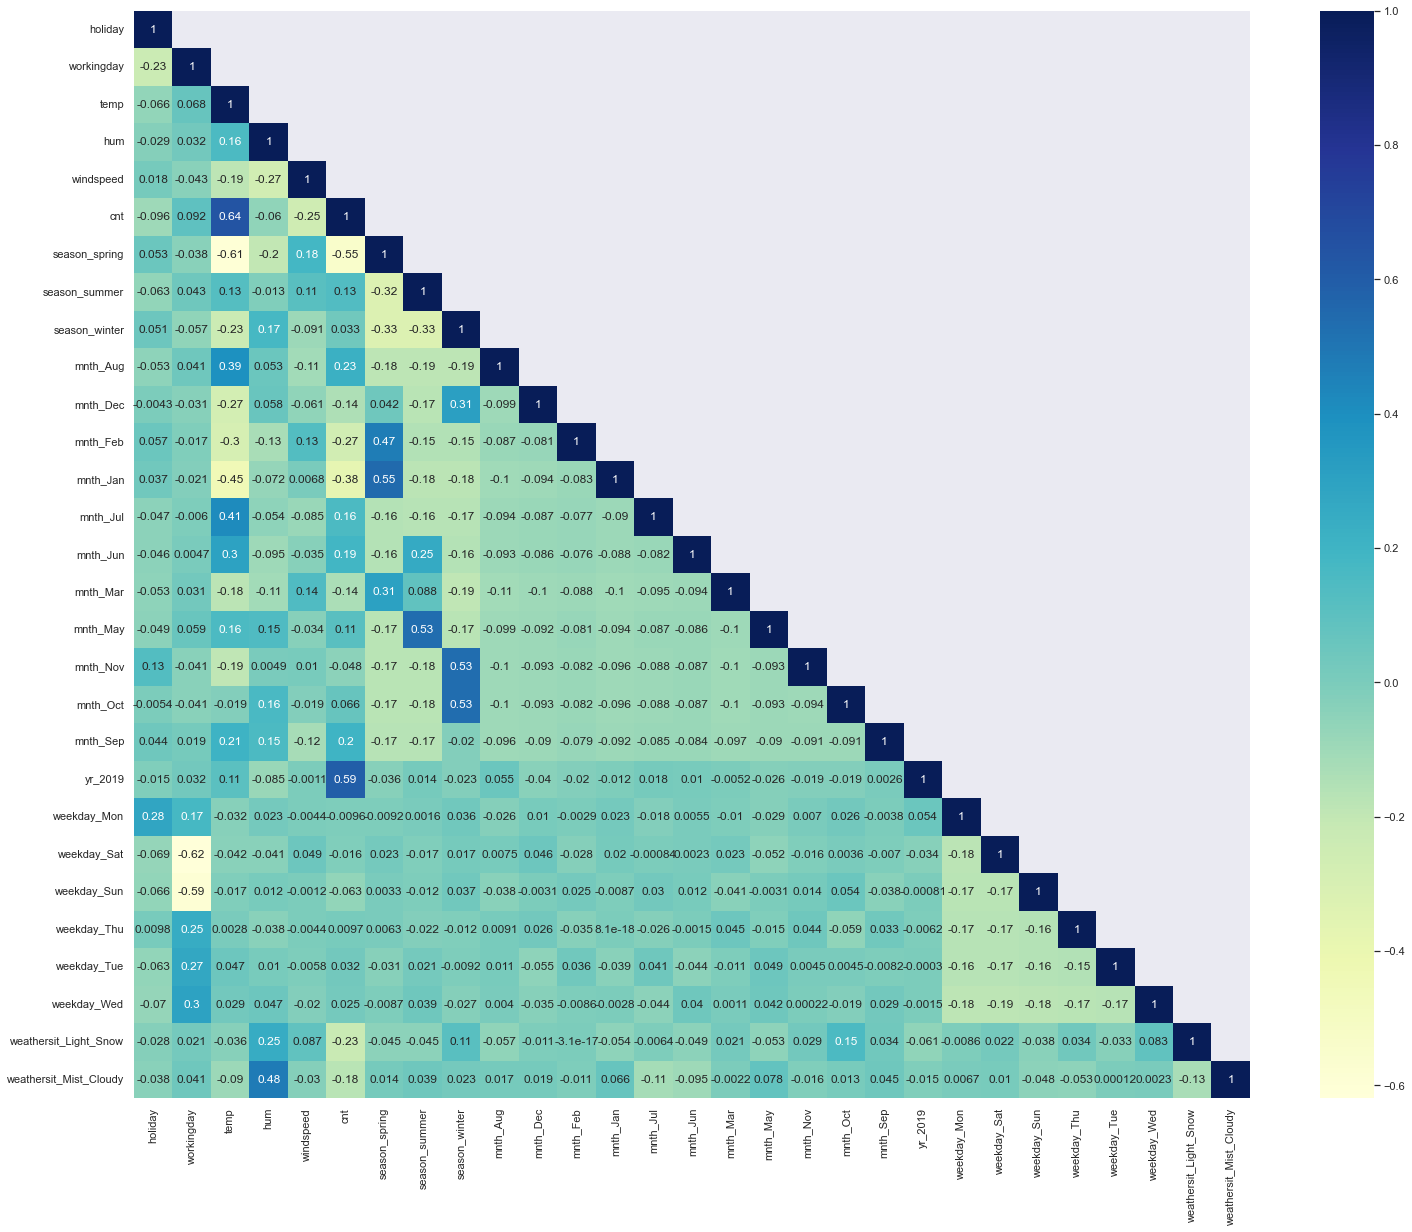

In [52]:
#Now we can plot correlation matrix for bk_train data
mask=np.array(bk_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(bk_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

#### If we observe temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

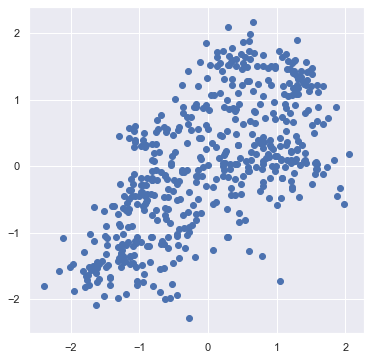

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(bk_train.temp, bk_train.cnt)
plt.show()

* Inference - So, we pick temp as the first variable and we'll try to fit a regression line to that.

<h4><font color = green >Dividing data into X and Y sets for the model building </font></h4>

In [54]:
y_train = bk_train.pop('cnt')
X_train = bk_train

In [55]:
X_train.shape

(510, 28)

In [56]:
y_train.shape

(510,)

### <a id="32"> Step 5: Building a linear model:</a>

**`Fit a regression line using statsmodels:`**

In [57]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Check the parameters obtained
lr.params

const                    -0.4401
holiday                  -0.3387
workingday                0.0487
temp                      0.4531
hum                      -0.0983
windspeed                -0.1410
season_spring            -0.2146
season_summer             0.1726
season_winter             0.4717
mnth_Aug                  0.0642
mnth_Dec                 -0.2032
mnth_Feb                 -0.1439
mnth_Jan                 -0.2798
mnth_Jul                 -0.1798
mnth_Jun                 -0.0132
mnth_Mar                  0.0047
mnth_May                  0.1067
mnth_Nov                 -0.1865
mnth_Oct                  0.0336
mnth_Sep                  0.3613
yr_2019                   1.0345
weekday_Mon              -0.0932
weekday_Sat               0.0465
weekday_Sun              -0.1966
weekday_Thu              -0.0412
weekday_Tue              -0.0842
weekday_Wed              -0.0240
weathersit_Light_Snow    -1.1474
weathersit_Mist_Cloudy   -0.2722
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.74e-182
Time:                        15:00:55   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

**`Dropping the Variable and Updating the Model:`**

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 
A low p-value (< 0.05) indicates that you can reject the null hypothesis.
Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [60]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.

X_train=X_train.drop('mnth_Mar', 1)

In [61]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.33e-183
Time:                        15:00:55   Log-Likelihood:                -234.22
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     483   BIC:                             636.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [63]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Jun', 1)

In [64]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.84e-184
Time:                        15:00:56   Log-Likelihood:                -234.23
No. Observations:                 510   AIC:                             520.5
Df Residuals:                     484   BIC:                             630.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [66]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Oct', 1)

In [67]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.40e-185
Time:                        15:00:56   Log-Likelihood:                -234.26
No. Observations:                 510   AIC:                             518.5
Df Residuals:                     485   BIC:                             624.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [69]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Thu', 1)

In [70]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.88e-186
Time:                        15:00:56   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [72]:
# We have high P value for weekday_Sunday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sun', 1)

In [73]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.88e-186
Time:                        15:00:56   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             516.9
Df Residuals:                     486   BIC:                             618.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [75]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,6.6300
5,season_spring,5.0300
2,temp,4.3500
7,season_winter,3.4400
6,season_summer,3.1300
11,mnth_Jan,2.5500
22,weathersit_Mist_Cloudy,2.3600
16,yr_2019,2.1000
8,mnth_Aug,2.0100
10,mnth_Feb,1.9800


#### The variable workingday has a significantly high VIF (6.63) and a high p-value (0.457) as well. Hence, this variable isn't of much use and should be dropped.

In [76]:
X_train=X_train.drop('workingday', 1)

In [77]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.09e-183
Time:                        15:00:56   Log-Likelihood:                -242.23
No. Observations:                 510   AIC:                             530.5
Df Residuals:                     487   BIC:                             627.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [79]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('weekday_Sat', 1)

In [80]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.01e-184
Time:                        15:00:56   Log-Likelihood:                -243.98
No. Observations:                 510   AIC:                             532.0
Df Residuals:                     488   BIC:                             625.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [82]:
# We have high P value for mnth_August feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_Aug', 1)

In [83]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [84]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.69e-185
Time:                        15:00:56   Log-Likelihood:                -244.29
No. Observations:                 510   AIC:                             530.6
Df Residuals:                     489   BIC:                             619.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [85]:
# We have high P value for weekday_wednesday  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Wed', 1)

In [86]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [87]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.42e-186
Time:                        15:00:56   Log-Likelihood:                -244.77
No. Observations:                 510   AIC:                             529.5
Df Residuals:                     490   BIC:                             614.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [88]:
# We have high P value for mnth_May feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_May', 1)

In [89]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.56e-186
Time:                        15:00:56   Log-Likelihood:                -245.78
No. Observations:                 510   AIC:                             529.6
Df Residuals:                     491   BIC:                             610.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [91]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_Feb', 1)

In [92]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          4.73e-187
Time:                        15:00:56   Log-Likelihood:                -247.20
No. Observations:                 510   AIC:                             530.4
Df Residuals:                     492   BIC:                             606.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [94]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.8200
4,season_spring,2.8000
6,season_winter,2.7100
16,weathersit_Mist_Cloudy,2.1300
12,yr_2019,2.0400
10,mnth_Nov,1.8400
2,hum,1.7900
8,mnth_Jan,1.7800
7,mnth_Dec,1.5400
5,season_summer,1.4800


#### The model lr_11 looks good because there are no features which is >0.05 and all the features VIF is less than 3.

### <a id="32"> Step 7: Residual Analysis of the train data:</a>

In [95]:
y_train_pred = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

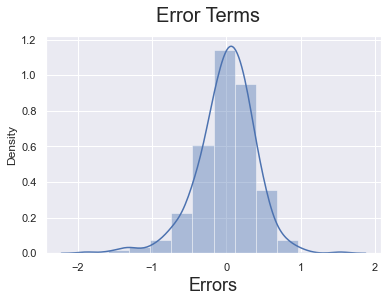

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### <a id="32"> Step 8: Making Predictions Using the Final Model:</a>

In [97]:
num_columns=['cnt','temp','hum','windspeed']
bk_test[num_columns] = scaler.transform(bk_test[num_columns])

In [98]:
bk_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000,219.0000
mean,0.0365,0.6986,0.0961,-0.0814,-0.0437,0.0311,0.2557,0.2648,0.2329,0.0594,0.0868,0.1005,0.0776,0.1050,0.0959,0.0548,0.0868,0.0731,0.0822,0.0868,0.4795,0.1279,0.1187,0.1461,0.1644,0.1644,0.1005,0.0274,0.3196
std,0.1880,0.4599,1.0358,1.0222,0.9429,0.9735,0.4373,0.4423,0.4236,0.2368,0.2821,0.3013,0.2682,0.3073,0.2951,0.2281,0.2821,0.2608,0.2753,0.2821,0.5007,0.3347,0.3242,0.3540,0.3715,0.3715,0.3013,0.1636,0.4674
min,0.0000,0.0000,-2.1747,-2.6654,-2.1433,-2.0743,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,-0.8094,-0.8447,-0.7207,-0.6065,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,1.0000,0.0950,-0.1553,-0.1256,0.0475,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.9832,0.6420,0.4851,0.7092,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.9819,2.4138,2.8692,2.0042,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Dividing into X_test and y_test

In [99]:
y_test = bk_test.pop('cnt')
X_test = bk_test

In [100]:
X_test.shape

(219, 28)

In [101]:
y_test.shape

(219,)

In [102]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [103]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weekday_Mon', 'weekday_Tue',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [104]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_2019',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [105]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_Mar','mnth_Jun','mnth_Oct','weekday_Thu','weekday_Sun','workingday','weekday_Sat',
             'mnth_Aug','weekday_Wed','mnth_May','mnth_Feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [106]:
y_pred_m = lr_11.predict(X_test_m)

### <a id="32"> Step 9: Model Evaluation:</a>

#### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

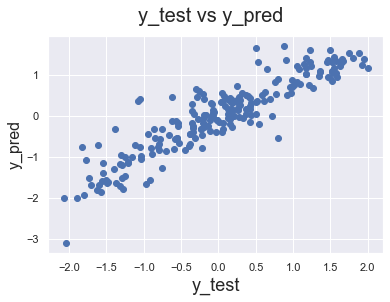

In [107]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

<h2><font color = Cyan >R-squared score: </font></h2>

In [108]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8456417428289594
Test R-Score:  0.8224713983062809


In [109]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'yr_2019', 'weekday_Mon', 'weekday_Tue',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

### Significant variables to predict the demand for shared bikes are;

* holiday
* temp
* hum
* windspeed
* Season(Spring,Summer,Winter)
* months(January, July, September, November, December)
* Year (2019)
* Monday and Tuesday
* weathersit( Light Snow, Mist Cloudy)

### Question -  Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?
<h3><font color = green >Answer - The Top 3 features contributing significantly towards the demands of share bikes are: 
    <li> 	weathersit_Light_Snow(negative correlation).</li>
    <li> 	yr_2019(Positive correlation).</li>
    <li> 	temp(Positive correlation).</li>
    </font></h3>